# Image Encryption and Decryption using Chaotic Key Sequence

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Image Pixels Array

In [3]:
image_path = "input_image.png"

img = cv2.imread(image_path)

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

original_shape = gray_img.shape

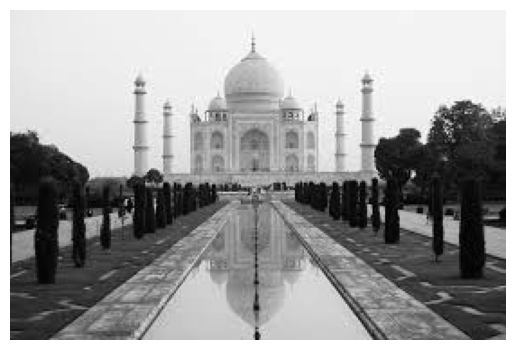

In [4]:
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
# Flatten the image to a 1D array
P = gray_img.flatten()

num_pixels = P.size

print(P)

[229 229 230 ... 117 117 117]


### Sequence of Keys from Logistic Map 

In [6]:
def logistic_map(r, x):
    return r * x * (1 - x)

def generate_sequence(n, r=3.99, x0=0.5):
    sequence = []
    x = x0
    for _ in range(n):
        x = logistic_map(r, x)
        sequence.append(x)

    sequence = np.array(sequence)
    sequence = np.round(sequence*255).astype(int)
    return sequence

sequence = generate_sequence(num_pixels)

K1 = generate_sequence(num_pixels)

print("Generated Sequence:", K1)

Generated Sequence: [254   3  10 ...  57 176 217]


In [7]:
# Convert sequence to binary
logistic_map_sequence = np.array([np.binary_repr(x) for x in K1])

print(logistic_map_sequence)

['11111110' '11' '1010' ... '111001' '10110000' '11011001']


### Sequence of Keys from Linear Feed Back Shift Register (LFBSR)

In [8]:
def lfsr(seed, length):
    sequence = []
    for _ in range(length):
        sequence.append(seed)
        xor = 0
        for pos in [1, 2, 3, 7]:
            bit = (seed >> pos) & 1
            xor ^= bit
        seed = ((seed << 1) | xor)
        seed &= 0b11111111 
        
    return np.array(sequence)

# Define the initial seed for an 8-bit LFSR
initial_seed = 0b10101010 

K2 = lfsr(initial_seed, num_pixels)

print("Generated Sequence:", K2)

Generated Sequence: [170  85 171 ...  57 115 231]


In [9]:
# Convert sequence to binary
lfsr_sequence = np.array([np.binary_repr(x) for x in K2])

# Print the generated sequence
print(lfsr_sequence)

['10101010' '1010101' '10101011' ... '111001' '1110011' '11100111']


### Final Key Sequence

In [10]:
K = K1 ^ K2
print(np.array([np.binary_repr(x) for x in K]))

['1010100' '1010110' '10100001' ... '0' '11000011' '111110']


### Encryption

In [11]:
C = P ^ K

encrypted_arr = C.reshape(original_shape)

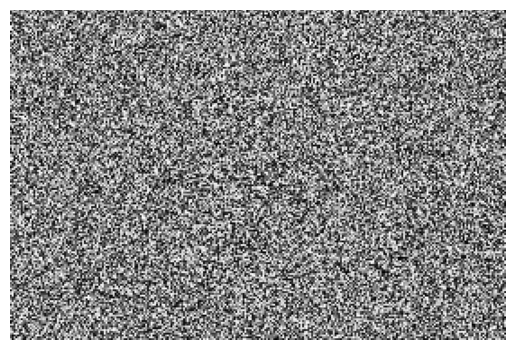

In [12]:
plt.imshow(encrypted_arr, cmap='gray') 
plt.axis('off') 
plt.show()

In [13]:
cv2.imwrite('encrypted_image.png', encrypted_arr)

True

### Decryption

In [14]:
encrypted_image_path = "encrypted_image.png"

img_encrypted = cv2.imread(encrypted_image_path)

gray_img_encrypted = cv2.cvtColor(img_encrypted, cv2.COLOR_BGR2GRAY)

In [15]:
C_dash = gray_img_encrypted.flatten()
D_dash = C_dash ^ (K)
decrypted_arr = D_dash.reshape(original_shape)

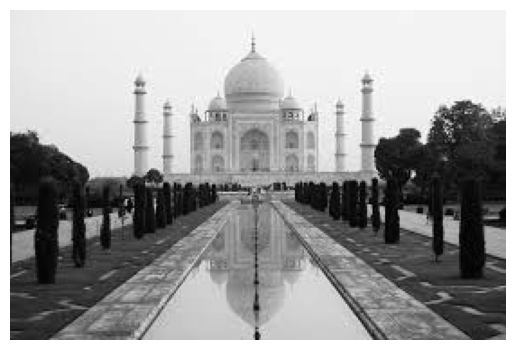

In [16]:
plt.imshow(decrypted_arr, cmap='gray')  
plt.axis('off')  
plt.show()

### Very High Sensitivity of Logistic Map Keys

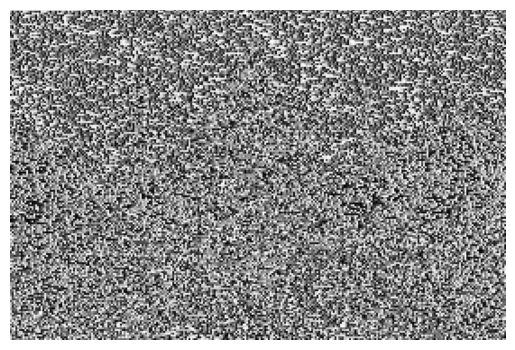

In [24]:
K1 = generate_sequence(num_pixels, x0 = 0.5000001)
K = K1 ^ K2
D_dash = C_dash ^ (K)
decrypted_arr = D_dash.reshape(original_shape)

plt.imshow(decrypted_arr, cmap='gray') 
plt.axis('off') 
plt.show()

### Histogram Analysis

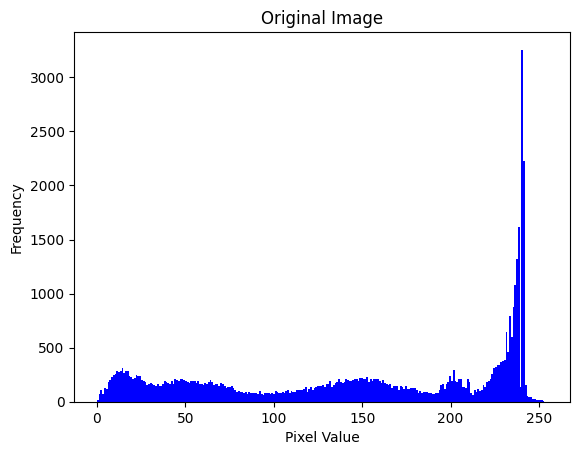

In [18]:
plt.hist(P, bins=256, range=(0, 255), alpha=1, color='blue')
plt.title('Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

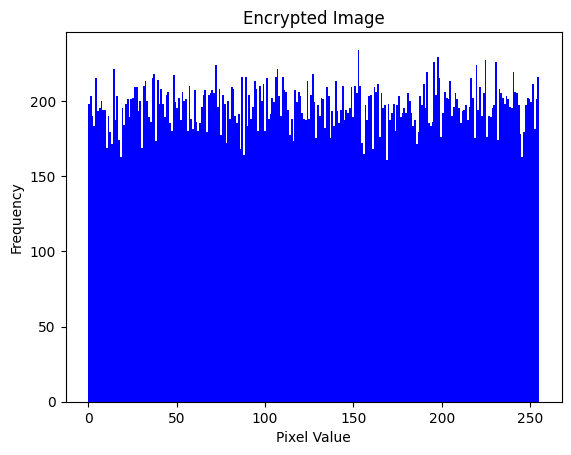

In [22]:
plt.hist(C_dash, bins=256, range=(0, 255), alpha=1, color='blue')
plt.title('Encrypted Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()